<a href="https://colab.research.google.com/github/ThuanPhong0126/PaternRecognize-project-cs338/blob/main/Universal_Sentence_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity

/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity


In [ ]:
!pip install --upgrade tensorflow-gpu
# Install TF-Hub.
!pip install tensorflow-hub

     |████████████████████████████████| 454.3MB 36kB/s 


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd

In [ ]:
dev = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/Quora dataset/dev.csv")
test = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/Quora dataset/test.csv")

In [ ]:
train = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/Quora dataset/train.csv")
train['question1'] = train['question1'].apply(lambda x: str(x))
train['question2'] = train['question2'].apply(lambda x: str(x))
train

,id,qid1,qid2,question1,question2,is_duplicate
0,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
1,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
2,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
3,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
4,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
...,...,...,...,...,...,...
244285,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1
244286,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
244287,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
244288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
sentences = list(train.question1) + list(train.question2)

In [ ]:
# Tokenization of each document
tokenized_sent = []
for s in sentences:
    s = str(s)
    tokenized_sent.append(word_tokenize(s.lower()))

In [ ]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
sentence_embeddings = model(sentences)

In [ ]:
query = "I had pizza and pasta"
query_vec = model([query])[0]
query_vec

<tf.Tensor: shape=(512,), dtype=float32, numpy=
array([-1.15908217e-02,  3.46413106e-02,  3.25885043e-02, -7.45856762e-03,
        1.40431551e-02,  6.57194778e-02,  3.63640189e-02,  2.34396243e-03,
       -2.63422206e-02,  4.08958718e-02, -5.96209466e-02, -6.47211820e-02,
        6.57714829e-02,  6.19853660e-02, -8.50182250e-02, -2.20416468e-02,
       -3.18464339e-02,  1.47753339e-02,  1.52689219e-02, -1.84846334e-02,
        3.02537773e-02,  5.23203164e-02, -4.30838875e-02,  3.99543606e-02,
        9.49091651e-03,  9.36833583e-03,  2.83710770e-02,  3.61935310e-02,
       -1.67489406e-02,  2.88653038e-02, -5.20901289e-03,  4.87725586e-02,
        4.29560989e-02,  1.23986807e-02, -2.27477811e-02,  3.33601534e-02,
        1.24800066e-02, -4.84303012e-02, -5.84019236e-02, -6.30955920e-02,
        4.74714339e-02, -1.03565902e-02,  8.43772441e-02,  4.69995365e-02,
       -4.04802114e-02, -3.85992602e-02, -7.12201968e-02, -3.97661561e-03,
        2.51777507e-02, -8.27023759e-02,  2.80949250

In [ ]:
dev = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/Quora dataset/dev.csv")
test = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/Quora dataset/test.csv")

In [ ]:
import tqdm

In [ ]:
predict_similarity = []
question1 = [str(s) for s in list(train.question1)]
question2 = [str(s) for s in list(train.question2)]
for idx, q1 in tqdm.tqdm(enumerate(question1)):
  q2 = question2[idx]
  vector1 = model([q1])[0]
  vector2 = model([q2])[0]
  predict_similarity.append(cosine(vector1, vector2))

244290it [20:48, 195.64it/s]


In [ ]:
ensemble_train = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/ensemble_train.csv")
ensemble_train

,distilbert-base-nli-stsb-quora-ranking,paraphrase-distilroberta-base-v2,paraphrase-mpnet-base-v2,paraphrase-MiniLM-L12-v2,nli-mpnet-base-v2,is_duplicate,paraphrase-TinyBERT-L6-v2,paraphrase-MiniLM-L6-v2,stsb-mpnet-base-v2,distiluse-base-multilingual-cased-v1,stsb-distilroberta-base-v2,nli-roberta-base-v2,stsb-roberta-base-v2,nli-distilroberta-base-v2,distiluse-base-multilingual-cased-v2,average_word_embeddings_komninos,average_word_embeddings_glove.6B.300d,average_word_embeddings_levy_dependency,tfidf,doc2vec,UniversalSentenceEncoder
0,0.696001,0.573700,0.569865,0.528683,0.593448,0,0.677278,0.576335,0.726059,0.584884,0.593941,0.588562,0.599323,0.607856,0.610290,0.874871,0.651956,0.818624,0.790132,0.256102,0.684389
1,0.644232,0.580639,0.639119,0.665531,0.751989,0,0.586621,0.690827,0.705231,0.794581,0.603158,0.676315,0.562753,0.671447,0.737434,0.847067,0.809579,0.877216,0.274691,0.545460,0.609381
2,0.524185,0.329884,0.357737,0.372725,0.381514,0,0.424391,0.375748,0.401750,0.474788,0.397911,0.373088,0.251338,0.409317,0.493282,0.768955,0.676888,0.774744,0.243344,0.546606,0.335715
3,0.797487,0.821957,0.829856,0.820814,0.842494,1,0.817135,0.840911,0.829541,0.864448,0.762922,0.806959,0.720074,0.800717,0.892830,0.819618,0.741882,0.874276,0.487620,0.778570,0.828617
4,0.405980,0.222970,0.268923,0.360277,0.774101,0,0.167811,0.321182,0.502594,0.712492,0.448202,0.754384,0.560354,0.657452,0.730754,1.000000,1.000000,1.000001,1.000000,0.601863,0.743321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244285,0.968404,0.924721,0.971645,0.958220,0.975229,1,0.961037,0.956967,0.970600,0.964372,0.863011,0.903813,0.903206,0.898462,0.965878,0.950473,0.927411,0.965316,0.811930,0.881391,0.928728
244286,0.567139,0.586432,0.591516,0.550486,0.757204,0,0.686659,0.557353,0.557772,0.854385,0.636474,0.811767,0.604400,0.828141,0.882678,0.946330,0.906133,0.958616,0.693523,0.779803,0.757957
244287,0.952039,0.947387,0.922788,0.910906,0.922571,1,0.928489,0.914483,0.924535,0.909789,0.923433,0.938677,0.931787,0.924841,0.887078,0.872990,0.941845,0.847171,0.631680,0.917195,0.904780
244288,0.279280,0.014479,0.007940,-0.103434,0.076680,0,-0.016502,-0.132550,0.040603,0.143299,-0.007328,0.065641,0.044847,0.063082,0.081014,0.545603,0.348115,0.621314,0.000000,0.295946,0.131100


In [ ]:
ensemble_train['UniversalSentenceEncoder'] = predict_similarity
ensemble_train

,distilbert-base-nli-stsb-quora-ranking,paraphrase-distilroberta-base-v2,paraphrase-mpnet-base-v2,paraphrase-MiniLM-L12-v2,nli-mpnet-base-v2,is_duplicate,paraphrase-TinyBERT-L6-v2,paraphrase-MiniLM-L6-v2,stsb-mpnet-base-v2,distiluse-base-multilingual-cased-v1,stsb-distilroberta-base-v2,nli-roberta-base-v2,stsb-roberta-base-v2,nli-distilroberta-base-v2,distiluse-base-multilingual-cased-v2,average_word_embeddings_komninos,average_word_embeddings_glove.6B.300d,average_word_embeddings_levy_dependency,tfidf,doc2vec,UniversalSentenceEncoder
0,0.696001,0.573700,0.569865,0.528683,0.593448,0,0.677278,0.576335,0.726059,0.584884,0.593941,0.588562,0.599323,0.607856,0.610290,0.874871,0.651956,0.818624,0.790132,0.256102,0.684389
1,0.644232,0.580639,0.639119,0.665531,0.751989,0,0.586621,0.690827,0.705231,0.794581,0.603158,0.676315,0.562753,0.671447,0.737434,0.847067,0.809579,0.877216,0.274691,0.545460,0.609381
2,0.524185,0.329884,0.357737,0.372725,0.381514,0,0.424391,0.375748,0.401750,0.474788,0.397911,0.373088,0.251338,0.409317,0.493282,0.768955,0.676888,0.774744,0.243344,0.546606,0.335715
3,0.797487,0.821957,0.829856,0.820814,0.842494,1,0.817135,0.840911,0.829541,0.864448,0.762922,0.806959,0.720074,0.800717,0.892830,0.819618,0.741882,0.874276,0.487620,0.778570,0.828617
4,0.405980,0.222970,0.268923,0.360277,0.774101,0,0.167811,0.321182,0.502594,0.712492,0.448202,0.754384,0.560354,0.657452,0.730754,1.000000,1.000000,1.000001,1.000000,0.601863,0.743321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244285,0.968404,0.924721,0.971645,0.958220,0.975229,1,0.961037,0.956967,0.970600,0.964372,0.863011,0.903813,0.903206,0.898462,0.965878,0.950473,0.927411,0.965316,0.811930,0.881391,0.928728
244286,0.567139,0.586432,0.591516,0.550486,0.757204,0,0.686659,0.557353,0.557772,0.854385,0.636474,0.811767,0.604400,0.828141,0.882678,0.946330,0.906133,0.958616,0.693523,0.779803,0.757957
244287,0.952039,0.947387,0.922788,0.910906,0.922571,1,0.928489,0.914483,0.924535,0.909789,0.923433,0.938677,0.931787,0.924841,0.887078,0.872990,0.941845,0.847171,0.631680,0.917195,0.904780
244288,0.279280,0.014479,0.007940,-0.103434,0.076680,0,-0.016502,-0.132550,0.040603,0.143299,-0.007328,0.065641,0.044847,0.063082,0.081014,0.545603,0.348115,0.621314,0.000000,0.295946,0.131100


In [ ]:
ensemble_train.to_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/ensemble_train.csv", index = False)

In [ ]:
import seaborn as sns

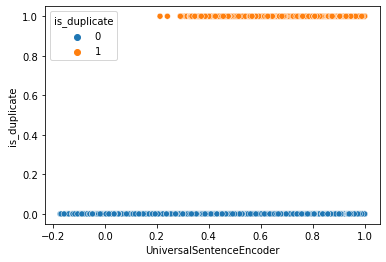

In [ ]:
sns.scatterplot(data=ensemble_train, x="UniversalSentenceEncoder", y="is_duplicate", hue="is_duplicate")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_performance(gold, predict):
  return accuracy_score(gold, predict), f1_score(gold, predict), f1_score(gold, predict, average='weighted')

In [ ]:
f1_max, u = 0.0, 0
u_tmp = -0.4
while u_tmp<=1.0:
  predict = []
  for s in ensemble_train['UniversalSentenceEncoder']:
    if s<u_tmp: predict.append(0)
    else: predict.append(1)
  acc, f1 = compute_performance(ensemble_train['is_duplicate'], predict)
  if f1>f1_max:
    f1_max = f1
    u = u_tmp
    accuracy = acc
  u_tmp += 0.01
print(f"u: {u}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1_max}")

u: 0.7000000000000006
Accuracy: 0.7100863727536944
F1-score: 0.6935939534742862


In [ ]:
ensemble_train = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/ensemble_train.csv")
ensemble_dev = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/ensemble_dev.csv")
ensemble_test = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/ensemble_test.csv")

In [ ]:
predicted = []
for s in ensemble_dev['UniversalSentenceEncoder']:
  if s<0.7: predicted.append(0)
  else: predicted.append(1)
compute_performance(ensemble_dev['is_duplicate'], predicted)

(0.707675, 0.6890655746423443, 0.7112903046951374)

In [ ]:
predicted = []
for s in ensemble_test['UniversalSentenceEncoder']:
  if s<0.7: predicted.append(0)
  else: predicted.append(1)
compute_performance(ensemble_test['is_duplicate'], predicted)

(0.70975, 0.693141271309634, 0.71301659995326)